$$\textrm{Joaquin Peñuela Parra}$$
$$\textrm{Universidad de los Andes}$$
$$\textrm{Grupo de Física de Altas Energías: Fenomenología de Partículas}$$

$\textbf{Preliminares}$ 

Las librerías que se usan aquí son las siguientes: 

In [1]:
import pandas as pd
import numpy as np
import os
import sys

import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"

path_signal_production = os.path.join(os.path.dirname(os.getcwd()), '01_signal_production')

In [2]:
channels = ["hadronic_dLQ", "hadronic_sLQ", "hadronic_non-resonant", "semileptonic_dLQ", "semileptonic_sLQ", "semileptonic_non-resonant"]
signals = ['lq_lq', 'lq_ta', 'ta_ta']

suffix_by_betard = {'wRHC': '', 'woRHC': '_wo_RHC'}
header_by_betard = {'wRHC': '#beta_{R} = -1', 'woRHC': '#beta_{R} = 0'}

In [3]:
Tablas_XS = {}
for betard in suffix_by_betard.keys():
    for signal in signals:
        
        Tablas_XS[f'{signal}_{betard}'] = pd.read_csv(f'{path_signal_production}/Data_Generation_{betard}/Data_5K_13_TeV/{signal}/Cross_Sections/XS_Matriz.csv', index_col = 0)
        Tablas_XS[f'{signal}_{betard}'].columns = [float(colum)/1000 for colum in Tablas_XS[f'{signal}_{betard}'].columns]
        Tablas_XS[f'{signal}_{betard}'].index = [float(fila) for fila in Tablas_XS[f'{signal}_{betard}'].index]
        #Tablas_XS[f'{signal}_{betard}'].sort_index(level=0, ascending=False, inplace=True)

In [4]:
# Tablas_XS

In [5]:
Compositions = {}

In [6]:
Masses = ['1000', '1250', '1500', '1750', '2000', '2250', '2500']
g_Us = ['0.25', '0.5', '1', '1.5', '2.0', '2.5', '3.0']

In [7]:
for betard in suffix_by_betard.keys():
    Compositions[betard]= {}
    
    for channel in channels:
        Compositions[betard][channel] = {}
        
        Efficiences_Table = pd.read_csv(f'Cumulative_Efficiences/{channel}.csv', index_col = 0)
        for signal in signals:
            Compositions[betard][channel][signal] = {}

            for M in Masses:
                Compositions[betard][channel][signal][M] = {}
                
                for g_U in g_Us:
                    g_U = float(g_U)

                    Efficiences = { 'lq_lq': Efficiences_Table[f'LQ_LQ{suffix_by_betard[betard]}_{M}']['DeltaR > 0.3'],
                                    'lq_ta': Efficiences_Table[f'Tau_LQ{suffix_by_betard[betard]}_{M}']['DeltaR > 0.3'],
                                    'ta_ta': Efficiences_Table[f'Tau_Tau{suffix_by_betard[betard]}_{M}']['DeltaR > 0.3']}
                    
                    numerator = Tablas_XS[f'{signal}_{betard}'][float(M)/1000][g_U]*Efficiences[signal]
                    denominator = sum([Tablas_XS[f'{signal}_{betard}'][float(M)/1000][g_U]*Efficiences[signal] for signal in signals])
                    
                    Compositions[betard][channel][signal][M][g_U] = numerator/denominator
            
            Compositions[betard][channel][signal] = pd.DataFrame.from_dict(Compositions[betard][channel][signal])
            Compositions[betard][channel][signal].index = [float(fila) for fila in Compositions[betard][channel][signal].index]
            Compositions[betard][channel][signal].columns = [float(colum)/1000 for colum in Compositions[betard][channel][signal].columns]

In [8]:
# Compositions

In [9]:
!git clone https://github.com/Phenomenology-group-uniandes/Heatmap_Utilities.git
import nbimporter
sys.path.append(f'{os.getcwd()}/Heatmap_Utilities')

from Heatmap_Utilities.Main_Functions import smooth, plot_heatmap

Cloning into 'Heatmap_Utilities'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 58 (delta 25), reused 32 (delta 11), pack-reused 0
Receiving objects: 100% (58/58), 2.68 MiB | 2.28 MiB/s, done.
Resolving deltas: 100% (25/25), done.


In [10]:
titulos_izquierdas = { "hadronic_dLQ": r'b b $\tau_{h} \tau_{h}$', 
                       "hadronic_sLQ": r'b $\tau_{h} \tau_{h}$', 
                       "hadronic_non-resonant": r'$\tau_{h} \tau_{h}$', 
                       "semileptonic_dLQ": r'b b $\tau_{h} \tau_{lep}$', 
                       "semileptonic_sLQ": r'b $\tau_{h} \tau_{lep}$', 
                       "semileptonic_non-resonant": r' $\tau_{h} \tau_{lep}$'}
    
cbar_labels_by_signal = {'lq_ta': r'$S_{sLQ}/(S_{sLQ}+S_{dLQ} + S_{non-res})$',
                         'lq_lq': r'$S_{dLQ}/(S_{sLQ}+S_{dLQ} + S_{non-res})$',
                         'ta_ta': r'$S_{non-res}/(S_{sLQ}+S_{dLQ} + S_{non-res})$'}

/mnt/d/Bibliotecas/Documentos/GitHub/Leptoquarks_Searches_2023/03_delphes_preselection/Heatmap_Utilities/Main_Functions.ipynb:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  {


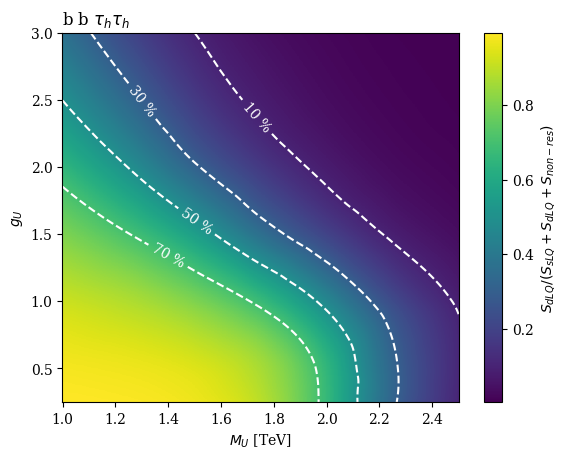

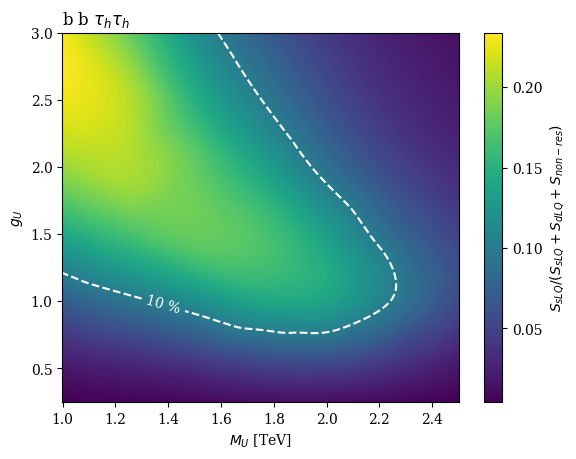

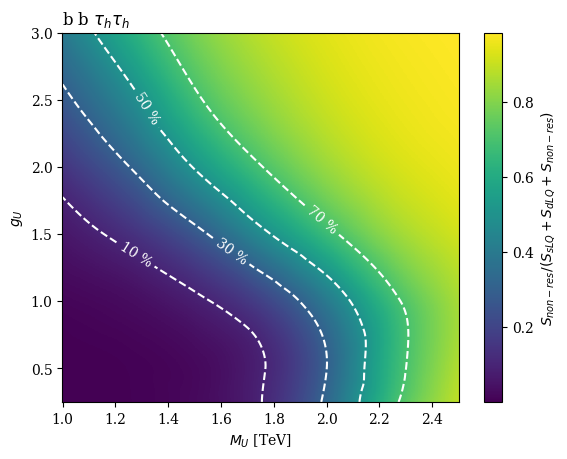

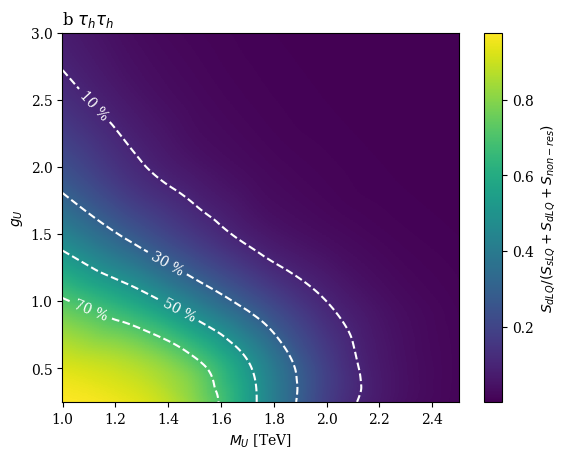

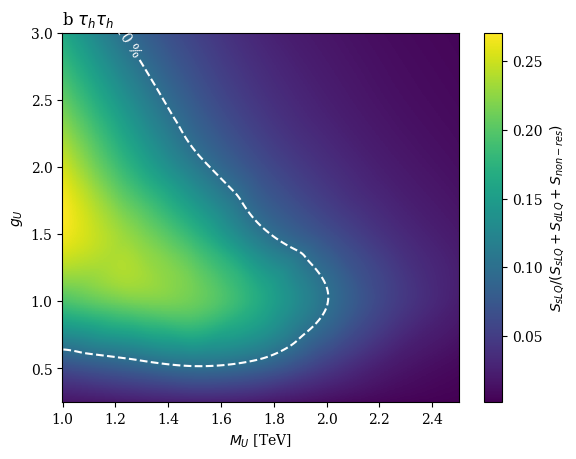

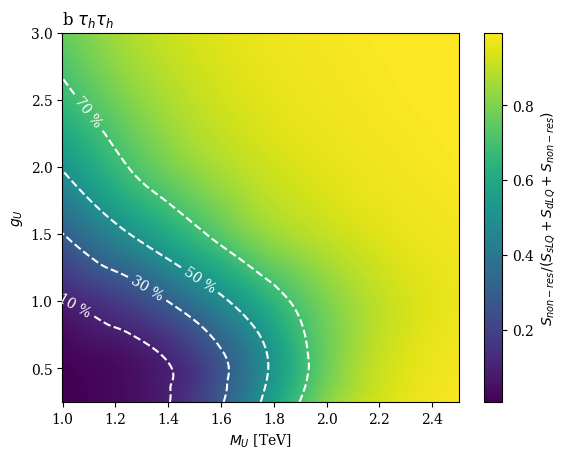

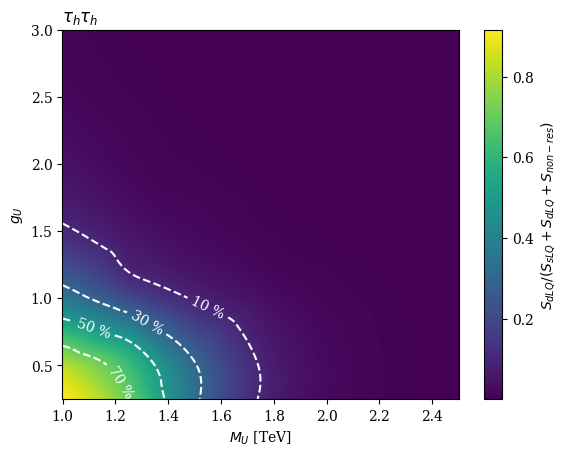

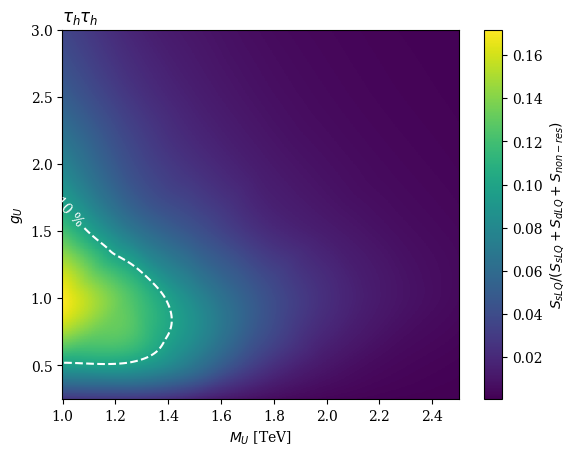

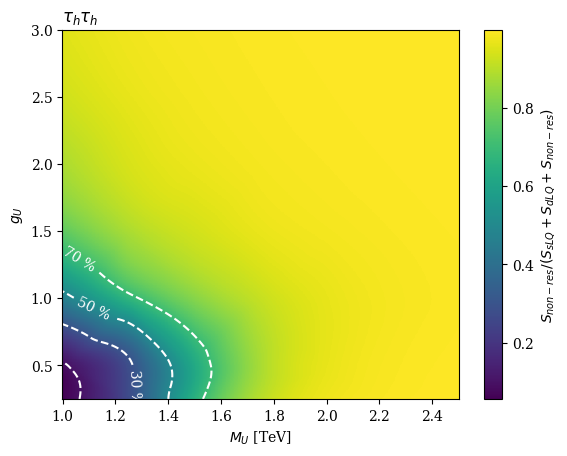

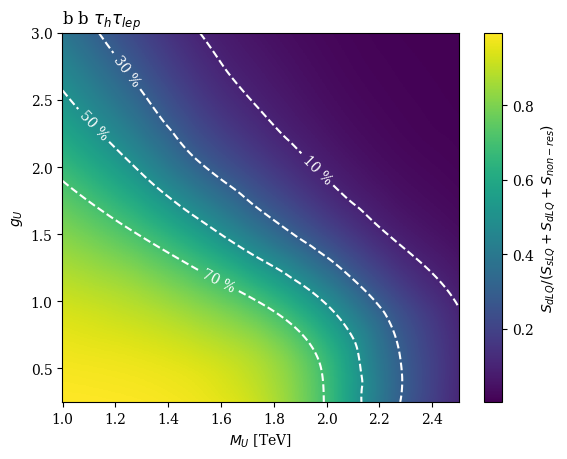

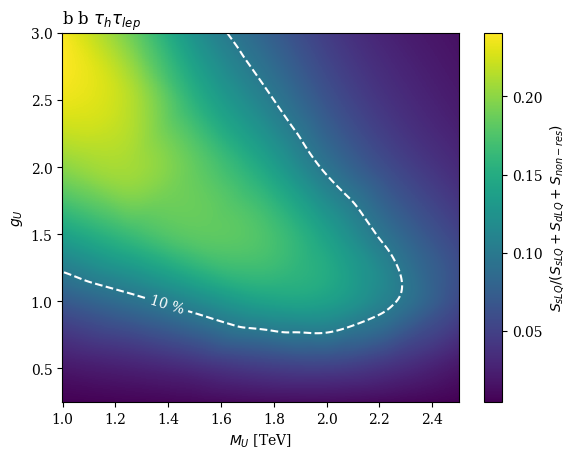

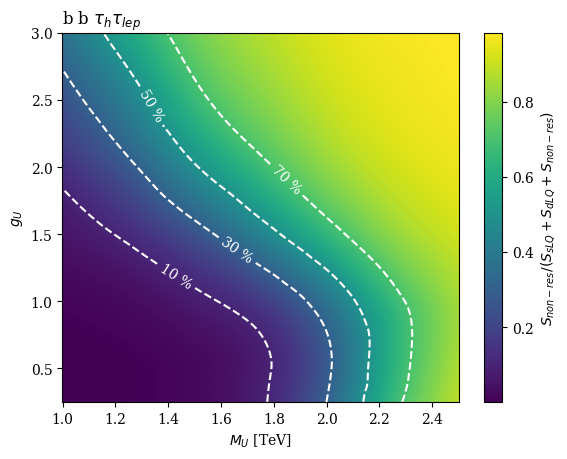

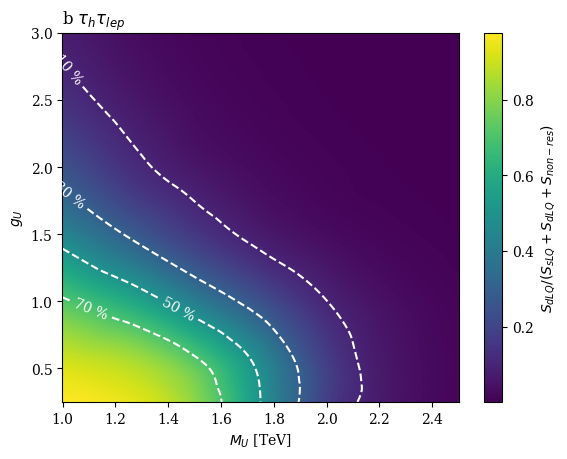

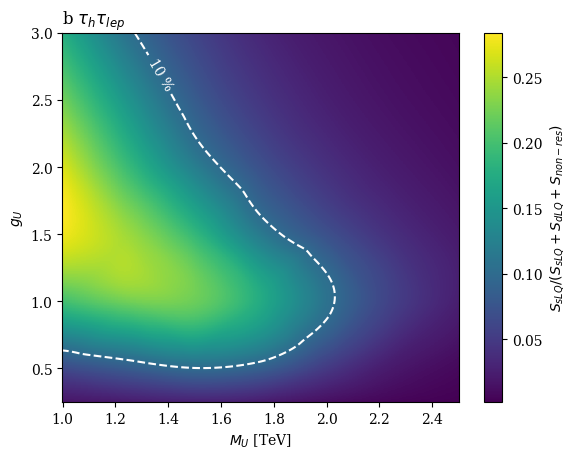

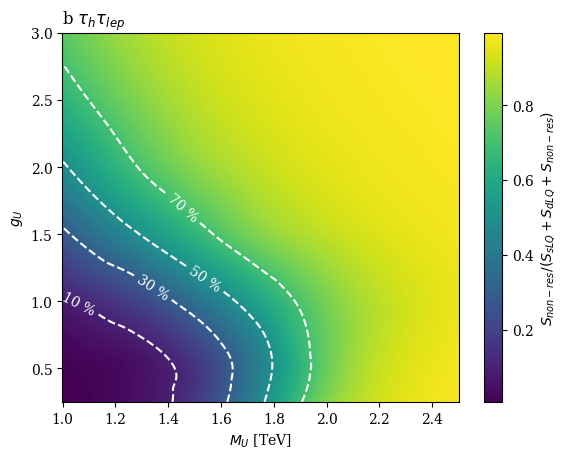

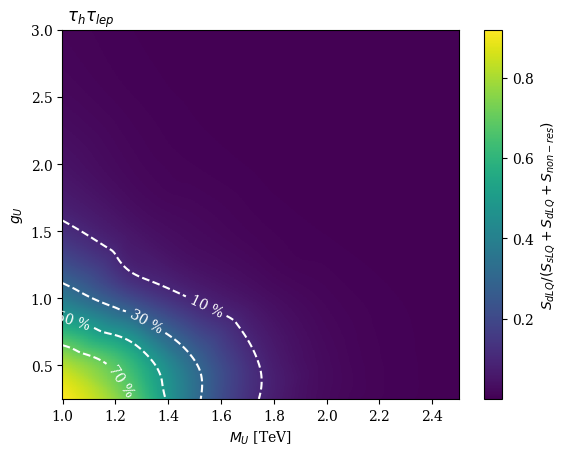

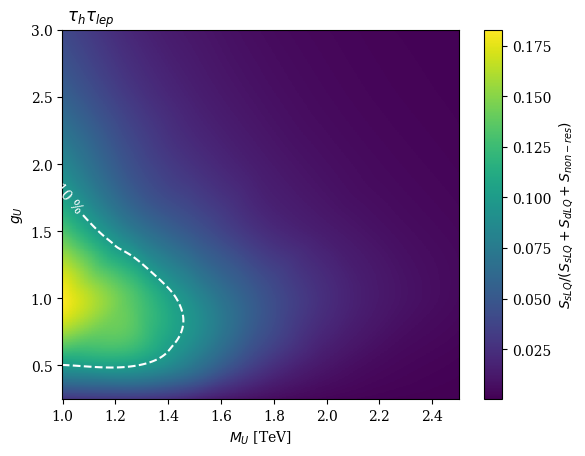

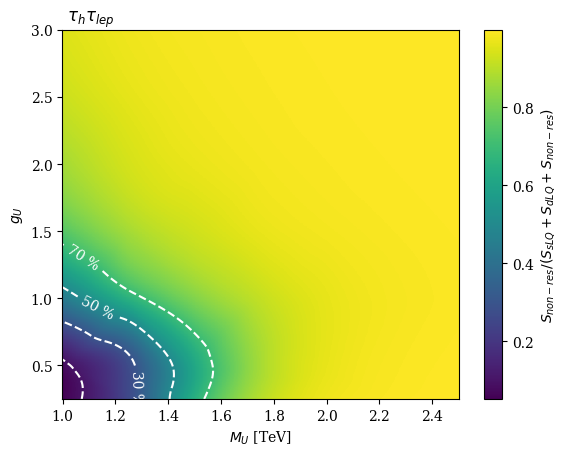

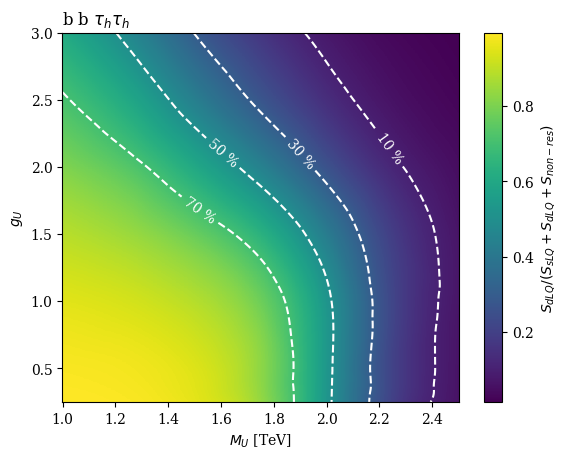

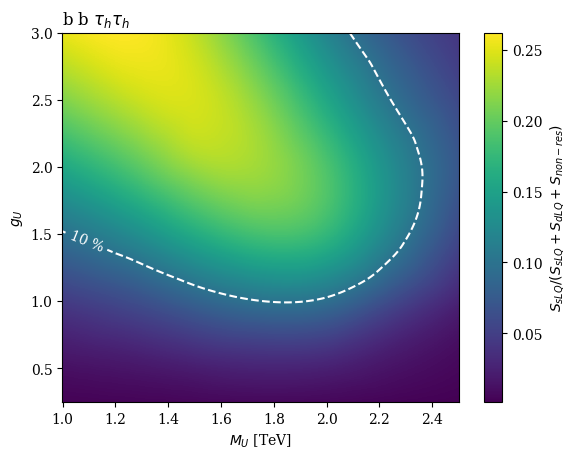

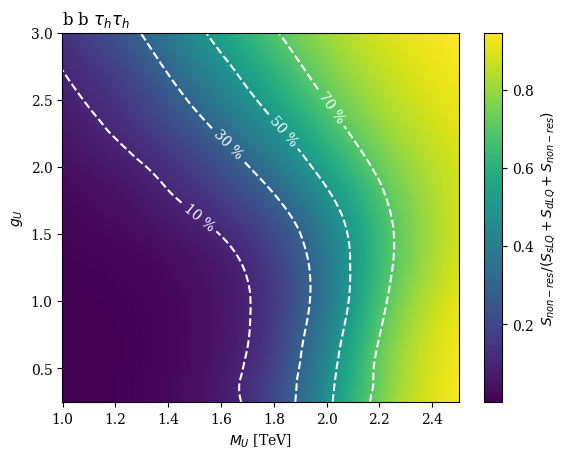

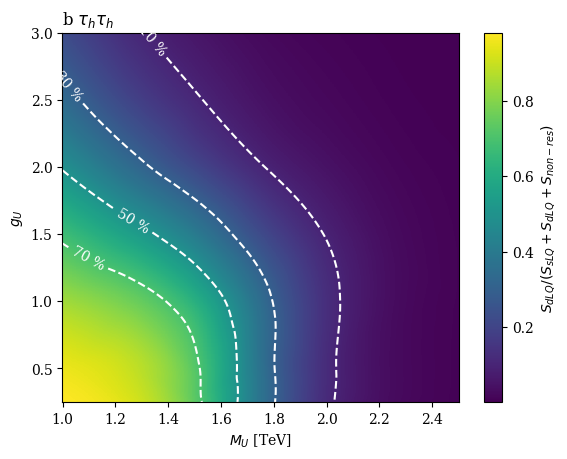

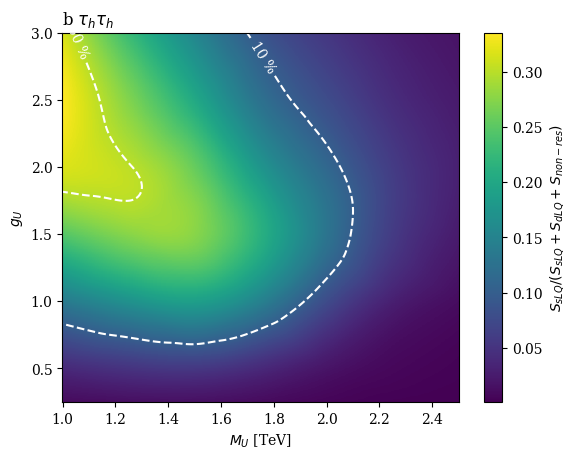

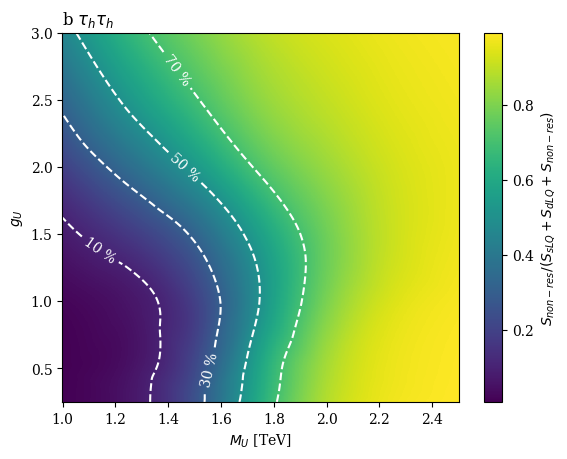

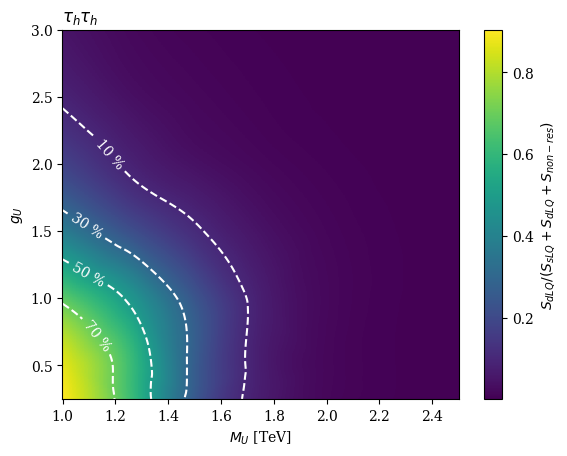

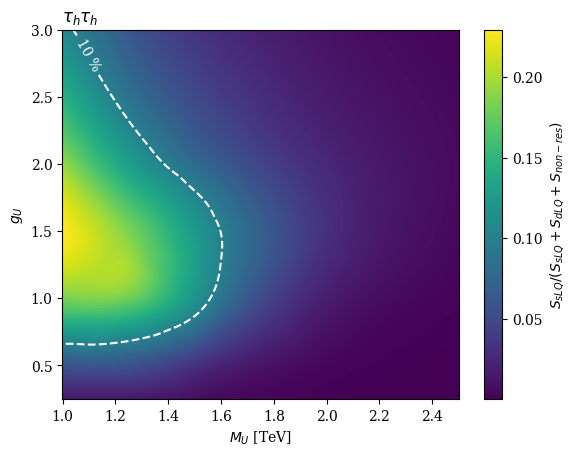

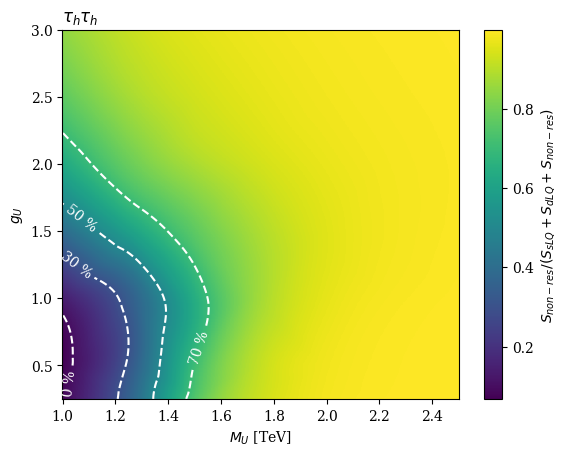

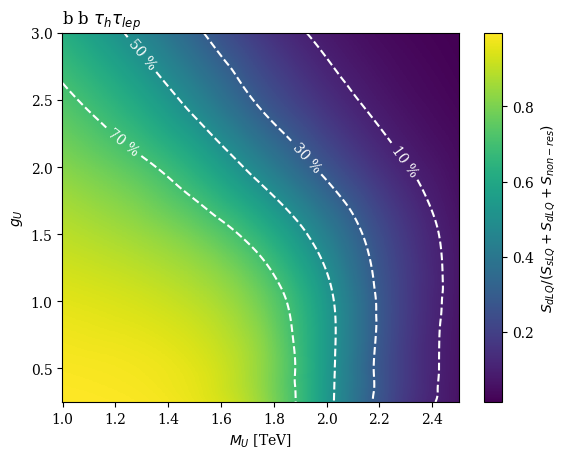

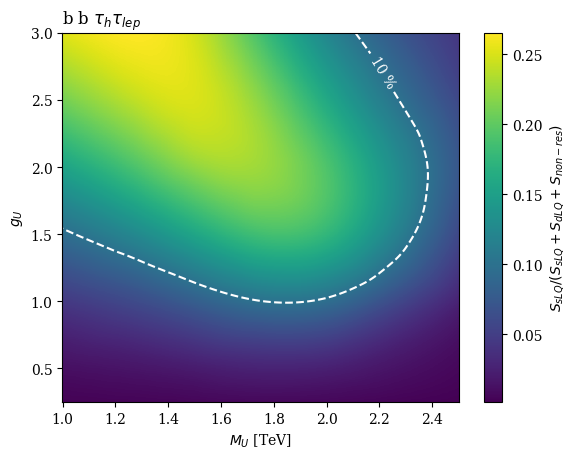

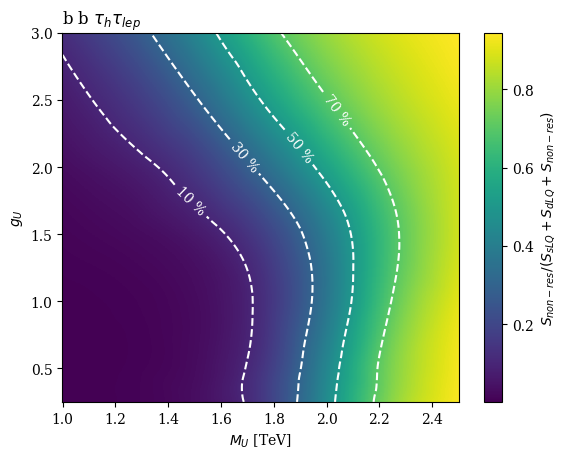

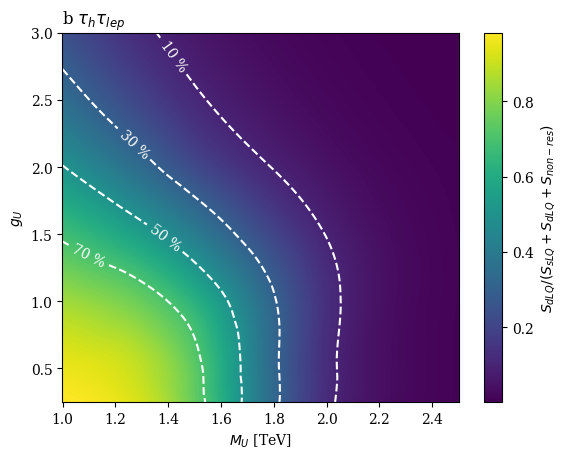

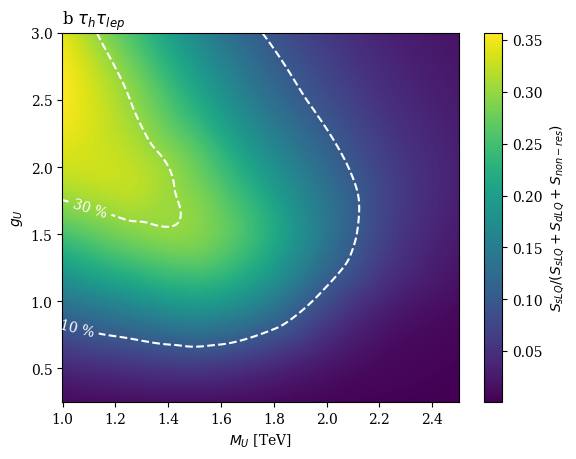

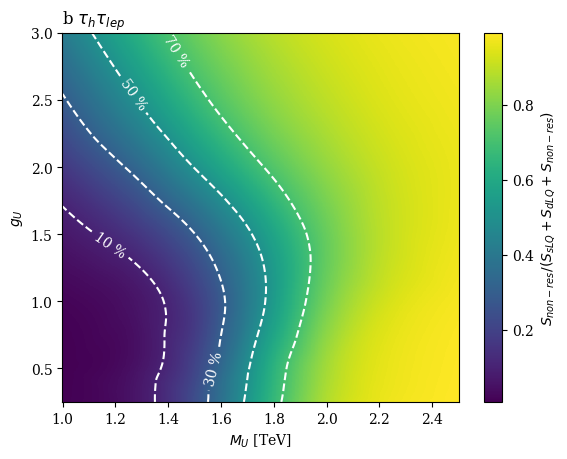

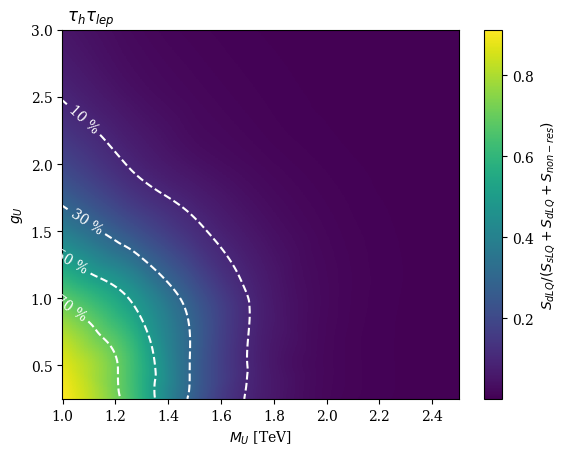

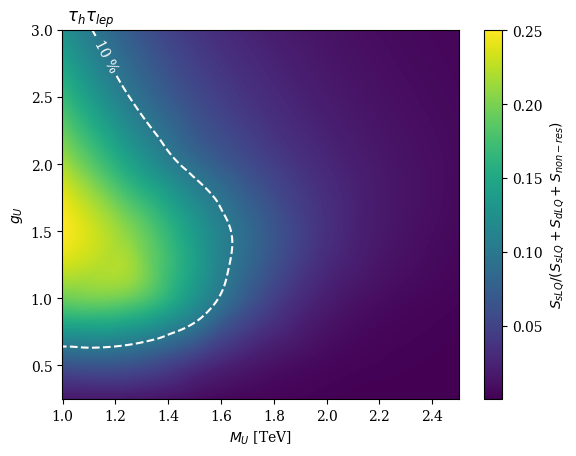

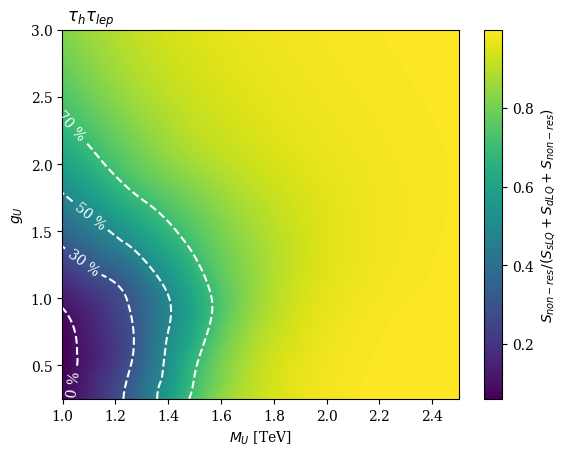

In [11]:
for betard in suffix_by_betard.keys():
    for channel in channels:
        for signal in signals:
            
            data = Compositions[betard][channel][signal]
            data_interpolate = smooth(data)            
            fig, ax = plot_heatmap(Data = data_interpolate,
                                   curvas_de_nivel = {0.1: '10 %', 0.3: '30 %', 0.5: '50 %', 0.7: '70 %'},
                                   titulos = {'titulo': '', 'titulo_izquierda': titulos_izquierdas[channel],'x_label': r'$M_{U}$ [TeV]', 'y_label': r'$g_U$', 'cbar_label': cbar_labels_by_signal[signal]})
            
            plt.savefig(f'Composition_Charts_Heatmaps/comp_{channel}_{signal}_{betard}.png', dpi = 300, bbox_inches='tight')

In [12]:
!rm -rf Heatmap_Utilities/